In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
df=pd.read_csv('Advertising.csv')

In [28]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [29]:
df=df.drop(columns=['Unnamed: 0'])

In [30]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
df.shape

(200, 4)

In [32]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


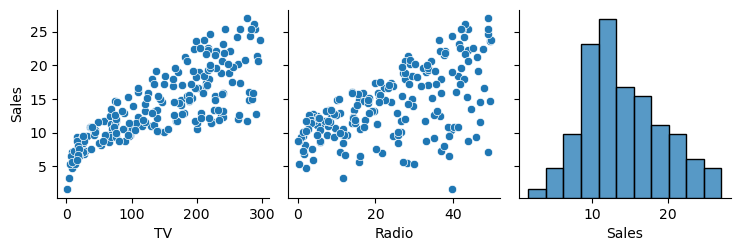

In [34]:
sns.pairplot(df,x_vars=['TV','Radio','Sales'],y_vars='Sales',kind='scatter')
plt.show()

<Axes: ylabel='Frequency'>

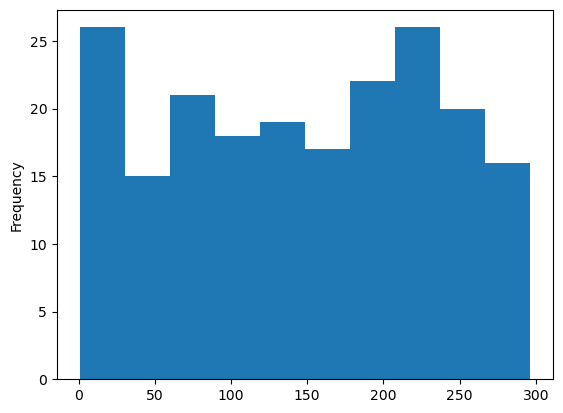

In [35]:
df['TV'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

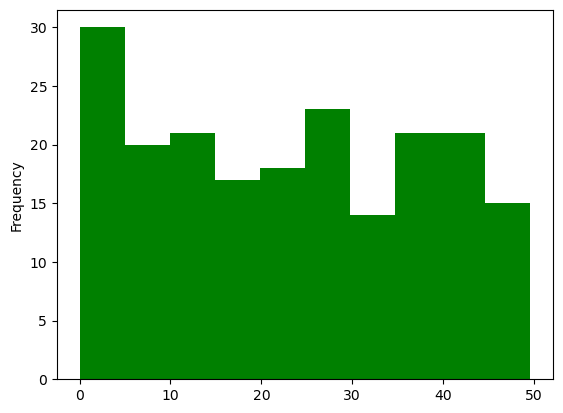

In [36]:
df['Radio'].plot.hist(bins=10,color='green')

<Axes: ylabel='Frequency'>

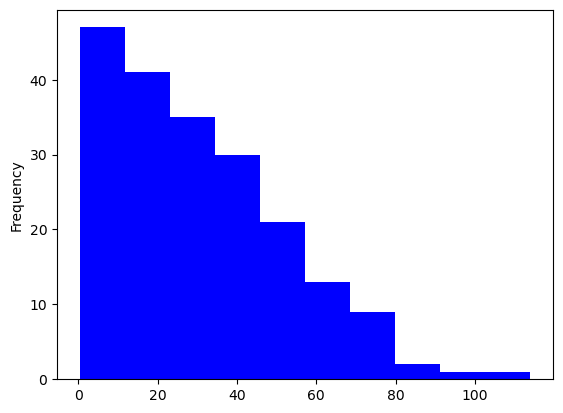

In [37]:
df['Newspaper'].plot.hist(bins=10,color='blue')

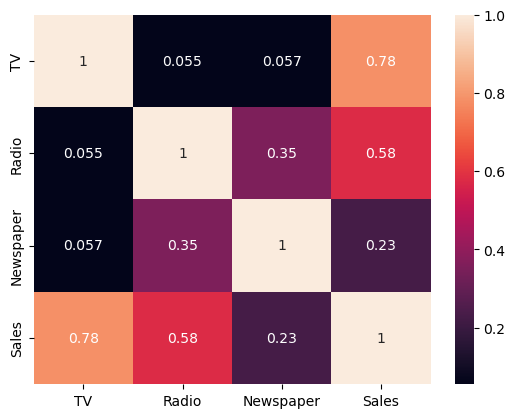

In [38]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [39]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [40]:
X=df.drop('Sales',axis=1)

In [41]:
y=df['Sales']

In [42]:
X,y

(        TV  Radio  Newspaper
 0    230.1   37.8       69.2
 1     44.5   39.3       45.1
 2     17.2   45.9       69.3
 3    151.5   41.3       58.5
 4    180.8   10.8       58.4
 ..     ...    ...        ...
 195   38.2    3.7       13.8
 196   94.2    4.9        8.1
 197  177.0    9.3        6.4
 198  283.6   42.0       66.2
 199  232.1    8.6        8.7
 
 [200 rows x 3 columns],
 0      22.1
 1      10.4
 2       9.3
 3      18.5
 4      12.9
        ... 
 195     7.6
 196     9.7
 197    12.8
 198    25.5
 199    13.4
 Name: Sales, Length: 200, dtype: float64)

In [43]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

In [44]:
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [45]:
model=LinearRegression()

In [46]:
model.fit(X_train,y_train)

LinearRegression()

In [47]:
print("Accuracy 'Linear Regression': ",model.score(X_test, y_test)*100)

Accuracy 'Linear Regression':  89.9438024100912


In [48]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [49]:
mse=mean_squared_error(y_test,y_pred)

In [50]:
r2=r2_score(y_test,y_pred)

In [51]:
cv=cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

In [55]:
print('Linear Regression')
print('Mean Squared Error: ',mse)
print('r2_score: ',r2)
print('Cross-Validation R2: ',cv.mean())

Linear Regression
Mean Squared Error:  3.1740973539761046
r2_score:  0.899438024100912
Cross-Validation R2:  0.8594884313276513


In [56]:
new_data=pd.DataFrame({'TV':[100],'Radio':[50],'Newspaper':[25]})
predicted_sales=model.predict(new_data)
print('Predicted Sales: ',predicted_sales)

Predicted Sales:  [16.98079966]
